# Algoritmo de Bernstein-Vazirani

Vamos considerar uma função
$$f:\{0,1\}^{n}\rightarrow \{0,1\}.$$
Ou seja, $f$ tem como input sequências de $n$ bits
$$x=x_{n-1}\cdots x_{1}x_{0}$$
com
$$x_{j}=0\ \text{ou}\ x_{j}=1$$
 para $j=0,\cdots,n-1$ e tem como output 0 ou 1.

Vamos considerar um __oráculo__ que contém uma __sequência secreta__ de bits
$$s=s_{n-1}\cdots s_{1}s_{0}$$
e que, em cada consulta (query), nos retorna
\begin{align}
f_{s}(x) & = s\cdot x \\
& = \sum_{j=0}^{n-1}s_{j}x_{j}\bmod 2.
\end{align}
O problema a ser resolvido é encontrar $s$:
$$s=?$$
Esse é o chamado __problema de Bernstein-Vazirani__. Nosso objetivo aqui é, dada essa promessa que a caixa preta calcula $f_s(x)=s\cdot x$, obter $s$ com o menor número possível de consultas à caixa preta.

Como cada consulta ao oráculo nos fornece um único escalar como resposta, __classicamente__ o melhor que podemos fazer, deterministicamente ou randomicamente, é fazer as seguintes $n$ perguntas:
\begin{align}
& f(100\cdots 00) = s_{n-1}, \\
& f(010\cdots 00) = s_{n-2}, \\
& f(001\cdots 00) = s_{n-3}, \\
& \vdots \\
& f(000\cdots 10) = s_{1}, \\
& f(000\cdots 01) = s_{0}.
\end{align}
Com isso, obtemos o valor de $s=s_{n-1}\cdots s_{1}s_{0}$. Como exemplo, consideremos
$$n=3\ \text{e}\ s=101.$$
Teremos que
\begin{align}
& f(100) = 1s_{2}+0s_{1}+0s_{0} = s_{2} = 1,\\
& f(010) = 0s_{2}+1s_{1}+0s_{0} = s_{1} = 0, \\
& f(001) = 0s_{2}+0s_{1}+1s_{0} = s_{0} =1.
\end{align}
Com isso, concluiremos que
$$s=(f(100))(f(010))(f(001)) = 101.$$

__Quanticamente__, no algoritmo de Bernstein-Vazirani (ABV), assim como no algoritmo de Deutsch-Jozsa (ADJ), começamos com $n+1$ qubits preparados no estado
\begin{align}
|\Psi_0\rangle & = |+\rangle^{\otimes n}\otimes|-\rangle \\
& = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}|x\rangle\otimes|-\rangle \\
& = \frac{1}{2^{(n+1)/2}}\sum_{x=0}^{2^{n}-1}|x\rangle\otimes\big(|0\rangle-|1\rangle\big).
\end{align}

O oráculo funciona de forma similar a no caso do ADJ:
$$U_{f}|x\rangle|y\rangle = |x\rangle|y\oplus f(x)\rangle.$$
No caso do ABV temos a seguinte ação específica do oráculo
$$U_{s}|x\rangle|y\rangle = |x\rangle|y\oplus s\cdot x\rangle.$$
Com isso, teremos que
\begin{align}
|\Psi_1\rangle & = U_{s}|\Psi_0\rangle \\
& = U_{s}|+\rangle^{n}|-\rangle \\
& =\frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1} U_f |x\rangle\otimes|-\rangle \\
& = \frac{1}{2^{(n+1)/2}}\sum_{x=0}^{2^{n}-1}\big(U_{s}|x\rangle|0\rangle - U_{s}|x\rangle|1\rangle\big) \\
& = \frac{1}{2^{(n+1)/2}}\sum_{x=0}^{2^{n}-1}\big(|x\rangle|0\oplus s\cdot x\rangle - |x\rangle|1\oplus s\cdot x\rangle\big) \\
& = \frac{1}{2^{(n+1)/2}}\sum_{x=0}^{2^{n}-1}|x\rangle\big(|s\cdot x\rangle - |\overline{s\cdot x}\rangle\big) \\
& = \frac{1}{2^{(n+1)/2}}\sum_{x=0}^{2^{n}-1}|x\rangle(-1)^{s\cdot x}\big(|0\rangle - |1\rangle\big) \\
& = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}(-1)^{s\cdot x}|x\rangle |-\rangle \\
& = |\psi_s\rangle|-\rangle.
\end{align}
Aqui aparece novamente o chamado _phase kickback_ (retorno da fase), pois a fase dependente de $x$ acaba sendo adicionada a este estado. Usar o estado $|-\rangle$ para o qubit auxiliar é importante para este método.


O algoritmo de Bernstein-Vazirani está ilustrado na figura abaixo.

![](https://drive.google.com/uc?export=view&id=1wGhYKpq2mydjob3MMS03ZrPiwj-0Z_bA)

Seguindo, vamos verificar que os estados
$$\Big\{|\psi_{s}\rangle := \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}(-1)^{s\cdot x}|x\rangle\Big\}_{s=0}^{2^n-1},$$
definidos acima, formam um conjunto ortonormal. Começamos olhando para o produto interno:
\begin{align}
\langle\psi_{s}|\psi_{t}\rangle & = \frac{1}{2^{n}}\sum_{x=0}^{2^{n}}(-1)^{s\cdot x}\langle x|\sum_{y=0}^{2^{n}}(-1)^{t\cdot y}|y\rangle \\
& = \frac{1}{2^{n}}\sum_{x,y=0}^{2^{n}}(-1)^{s\cdot x + t\cdot y}\langle x|y\rangle \\
& = \frac{1}{2^{n}}\sum_{x,y=0}^{2^{n}}(-1)^{s\cdot x + t\cdot y}\delta_{y,x} \\
& = \frac{1}{2^{n}}\sum_{x=0}^{2^{n}}(-1)^{s\cdot x + t\cdot x} \\
& = \frac{1}{2^{n}}\sum_{x=0}^{2^{n}}(-1)^{(s+t)\cdot x},
\end{align}
em que usamos
\begin{align}
s\cdot x + t\cdot x & = \sum_{j=0}^{n-1}s_{j}x_{j}\bmod2 + \sum_{j=0}^{n-1}t_{j}x_{j}\bmod2 \\
& = \Big(\sum_{j=0}^{n-1}s_{j}x_{j} + \sum_{j=0}^{n-1}t_{j}x_{j}\Big)\bmod2 \\
& = \sum_{j=0}^{n-1}(s_{j}+t_{j})x_{j}\bmod2 \\
& = (s+t)\cdot x.
\end{align}

Agora, para um dado $k=s+t$ teremos
\begin{align}
\sum_{x=0}^{2^{n}}(-1)^{k\cdot x} & \equiv \sum_{x_{1}=0}^{1}\sum_{x_{2}=0}^{1}\cdots\sum_{x_{n}=0}^{1} (-1)^{k_{1}x_{1}+k_{2}x_{2}+\cdots+k_{n}x_{n}} \\
 & = \sum_{x_{1}=0}^{1}(-1)^{k_{1}x_{1}}\sum_{x_{2}=0}^{1}(-1)^{k_{2}x_{2}}\cdots\sum_{x_{n}=0}^{1} (-1)^{k_{n}x_{n}} \\
& = 2\delta_{k_{1},0}2\delta_{k_{2},0}\cdots 2\delta_{k_{n},0} \\
& = 2^{n}\delta_{k,0},
\end{align}
em que usamos
\begin{align}
\sum_{x_{j}=0}^{1}(-1)^{k_{j}x_{j}} & = (-1)^{k_{j}0}+(-1)^{k_{j}1} \\
& = 1+(-1)^{k_{j}} \\
& = 2\delta_{k_{j},0}.
\end{align}

Por conseguinte, o produto interno será dado por
\begin{align}
\langle\psi_{s}|\psi_{t}\rangle & = \frac{1}{2^{n}}\sum_{x=0}^{2^{n}}(-1)^{(s+t)\cdot x} \\
& = \frac{1}{2^{n}}2^{n}\delta_{s+t,0} \\
& = \delta_{s,t},
\end{align}
pois a soma módulo 2 é feita bit a bit, e assim
$$s+t=0\ \therefore\ s=t.$$

Podemos verificar também que essa base é completa:
\begin{align}
\sum_{s=0}^{2^{n}-1}|\psi_{s}\rangle\langle\psi_{s}| & = \sum_{s=0}^{2^{n}-1}\frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}(-1)^{s\cdot x}|x\rangle\frac{1}{2^{n/2}}\sum_{y=0}^{2^{n}-1}(-1)^{s\cdot y}\langle y| \\
& = \frac{1}{2^{n}}\sum_{x,y=0}^{2^{n}-1}\Big(\sum_{s=0}^{2^{n}-1}(-1)^{s\cdot(x+y)}\Big)|x\rangle\langle y| \\
& = \frac{1}{2^{n}}\sum_{x,y=0}^{2^{n}-1}2^{n}\delta_{x,y}|x\rangle\langle y| \\
& = \sum_{x=0}^{2^{n}-1}|x\rangle\langle x| \\
& = \mathbb{I}_{2^{n}}.
\end{align}
A importância de $\{|\psi_{s}\rangle\}$ formar uma base ortonormal é que, a princípio, podemos medir nessa base, descobrindo assim o valor de $s$.

Agora, tendo o estado
$$|\Psi_1\rangle = U_{s}|+\rangle^{\otimes n}|-\rangle = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}(-1)^{s\cdot x}|x\rangle |-\rangle = |\psi_{s}\rangle|-\rangle,$$
vejamos como podemos obter $s$.

Consideremos a chamada _transformada de Hadamard_. Lembremos da porta de Hadamard, reescrita como segue
\begin{align}
H & = \frac{1}{2^{1/2}}\begin{bmatrix}1&1\\1&-1\end{bmatrix} \\
& = \frac{1}{2^{1/2}}\sum_{x_j,y_j=0}^{1}(-1)^{x_j y_j}|x_j\rangle\langle y_j|,
\end{align}
para escrever a tranformada de Hadamard na seguinte forma
\begin{align}
& H^{\otimes n} = H\otimes H\otimes\cdots\otimes H \\
& = \frac{1}{2^{1/2}}\sum_{x_{1},y_{1}=0}^{1}(-1)^{x_{1}y_{1}}|x_{1}\rangle\langle y_{1}|\otimes \frac{1}{2^{1/2}}\sum_{x_{2},y_{2}=0}^{1}(-1)^{x_{2}y_{2}}|x_{2}\rangle\langle y_{2}|\otimes\cdots\otimes \frac{1}{2^{1/2}}\sum_{x_{n},y_{n}=0}^{1}(-1)^{x_{n}y_{n}}|x_{n}\rangle\langle y_{n}| \\
& = \frac{1}{2^{n/2}}\sum_{x_{1},x_{2},\cdots,x_{n},y_{1},y_{2},\cdots,y_{n}=0}^{1}(-1)^{x_{1}y_{1}+x_{2}y_{2}+\cdots+x_{n}y_{n}}|x_{1}x_{2}\cdots x_{n}\rangle\langle y_{1}y_{2}\cdots y_{n}| \\
& = \frac{1}{2^{n/2}}\sum_{x,y=0}^{2^{n}-1}(-1)^{x\cdot y}|x\rangle\langle y| \\
& = \sum_{x=0}^{2^{n}-1}|x\rangle\frac{1}{2^{n/2}}\sum_{y=0}^{2^{n}-1}(-1)^{x\cdot y}\langle y| \\
& = \sum_{x=0}^{2^{n}-1}|x\rangle\langle\psi_{x}|,
\end{align}
em que usamos $ |\psi_x\rangle = \frac{1}{2^{n/2}}\sum_{y=0}^{2^{n}-1}(-1)^{x\cdot y}|y\rangle.$ Ou seja, a transformada de Hadamard faz a seguinte mudança de base:
$$H^{\otimes n}: \{|\psi_x\rangle\}_{x=0}^{2^n -1}\rightarrow\{|x\rangle\}_{x=0}^{2^n -1}.$$

Com isso, vem que
\begin{align}
H^{\otimes n}|\Psi_1\rangle & = (H^{\otimes n}\otimes I)U_{s}(|+\rangle^{\otimes n}\otimes|-\rangle) \\
& = (H^{\otimes n}\otimes I)U_{s}(H^{\otimes n}\otimes HX)(|0\rangle^{\otimes n}\otimes|0\rangle) & \\
& = H^{\otimes n}|\psi_{s}\rangle|-\rangle \\
& = \sum_{x=0}^{2^{n}-1}|x\rangle\langle\psi_{x}|\psi_{s}\rangle|-\rangle \\
& = \sum_{x=0}^{2^{n}-1}|x\rangle\delta_{x,s}|-\rangle \\
& = |s\rangle\otimes|-\rangle.
\end{align}

Portanto, _medindo os $n$ primeiros qubits na base computacional_, descobriremos o valor de $s$, usando uma única chamada da caixa preta quântica.

O circuito quântico completo para o algoritmo de Bernstein-Vazirani está mostrado na sequência, e é bem parecido com aquele referente ao algoritmo de Deutsch-Jozsa. Na verdade o que muda do ADJ para o ABV é que o oráculo é mais específico e que o problema a ser resolvido é outro.

## Exemplo

### Instalações do Qiskit

In [ ]:
!pip install qiskit
!pip install qiskit_aer
!pip install matplotlib
!pip install pylatexenc
!pip install qiskit-ibm-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=84b43a6af0fe7dc46eeb2f98f5146ff7852c90671c14927cf4749ebff7c717b0
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━

In [ ]:
import numpy as np
import math
from qiskit import QuantumCircuit

### Circuito quântico

Para a solução
$$s = 011$$
Temos que
\begin{align}
& s.x = 011.000 = 0 + 0 + 0 = 0, \\
& s.x = 011.001 = 0 + 0 + 1 = 1, \\
& s.x = 011.010 = 0 + 1 + 0 = 1, \\
& s.x = 011.011 = 0 + 1 + 1 = 0, \\
& s.x = 011.100 = 0 + 0 + 0 = 0, \\
& s.x = 011.101 = 0 + 0 + 1 = 1, \\
& s.x = 011.110 = 0 + 1 + 0 = 1, \\
& s.x = 011.111 = 0 + 1 + 1 = 0.
\end{align}
Ou seja, esse seria mais um exemplo de função balanceada, conforme vimos no algoritmo de Deutsch-Jozsa.

Com isso, o operador unitário do oráculo é obtido como segue
\begin{align}
U_f & = \sum_{x=0}^{2^3 - }\sum_{y=0}^{2^1 - 1}|x\rangle\langle x|\otimes|y\oplus f(x)\rangle\langle y| \\
& = \sum_{x=0}^{7}\sum_{y=0}^{1}|x\rangle\langle x|\otimes|y\oplus s.x\rangle\langle y| \\
& = \sum_{y=0}^{1}\big(|0\rangle\langle 0|\otimes|y\oplus s.0\rangle\langle y| + |1\rangle\langle 1|\otimes|y\oplus s.1\rangle\langle y| + |2\rangle\langle 2|\otimes|y\oplus s.2\rangle\langle y| + |3\rangle\langle 3|\otimes|y\oplus s.3\rangle\langle y| \\
& + |4\rangle\langle 4|\otimes|y\oplus s.4\rangle\langle y| + |5\rangle\langle 5|\otimes|y\oplus s.5\rangle\langle y| + |6\rangle\langle 6|\otimes|y\oplus s.6\rangle\langle y| + |7\rangle\langle 7|\otimes|y\oplus s.7\rangle\langle y|\big) \\
& = \sum_{y=0}^{1}\big(|000\rangle\langle 000|\otimes|y\oplus 011.000\rangle\langle y| + |001\rangle\langle 001|\otimes|y\oplus 011.001\rangle\langle y| + |010\rangle\langle 010|\otimes|y\oplus 011.010\rangle\langle y| + |011\rangle\langle 011|\otimes|y\oplus 011.011\rangle\langle y| \\
& + |100\rangle\langle 100|\otimes|y\oplus 011.100\rangle\langle y| + |101\rangle\langle 101|\otimes|y\oplus 011.101\rangle\langle y| + |110\rangle\langle 110|\otimes|y\oplus 011.110\rangle\langle y| + |111\rangle\langle 111|\otimes|y\oplus 011.111\rangle\langle y|\big) \\
& = \sum_{y=0}^{1}\big(|000\rangle\langle 000|\otimes|y\oplus 0\rangle\langle y| + |001\rangle\langle 001|\otimes|y\oplus 1\rangle\langle y| + |010\rangle\langle 010|\otimes|y\oplus 1\rangle\langle y| + |011\rangle\langle 011|\otimes|y\oplus 0\rangle\langle y| \\
& + |100\rangle\langle 100|\otimes|y\oplus 0\rangle\langle y| + |101\rangle\langle 101|\otimes|y\oplus 1\rangle\langle y| + |110\rangle\langle 110|\otimes|y\oplus 1\rangle\langle y| + |111\rangle\langle 111|\otimes|y\oplus 0\rangle\langle y|\big) \\
& = |000\rangle\langle 000|\otimes\sum_{y=0}^{1}|y\rangle\langle y| + |001\rangle\langle 001|\otimes\sum_{y=0}^{1}|\overline{y}\rangle\langle y| + |010\rangle\langle 010|\otimes\sum_{y=0}^{1}|\overline{y}\rangle\langle y| + |011\rangle\langle 011|\otimes\sum_{y=0}^{1}|y\rangle\langle y| \\
& + |100\rangle\langle 100|\otimes\sum_{y=0}^{1}|y\rangle\langle y| + |101\rangle\langle 101|\otimes\sum_{y=0}^{1}|\overline{y}\rangle\langle y| + |110\rangle\langle 110|\otimes\sum_{y=0}^{1}|\overline{y}\rangle\langle y| + |111\rangle\langle 111|\otimes\sum_{y=0}^{1}|y\rangle\langle y| \\
& = |000\rangle\langle 000|\otimes I + |001\rangle\langle 001|\otimes X + |010\rangle\langle 010|\otimes X + |011\rangle\langle 011|\otimes I \\
& + |100\rangle\langle 100|\otimes I + |101\rangle\langle 101|\otimes X + |110\rangle\langle 110|\otimes X + |111\rangle\langle 111|\otimes I \\
& = \big(|000\rangle\langle 000| + |011\rangle\langle 011| + |100\rangle\langle 100| + |111\rangle\langle 111|\big)\otimes I \\
& + \big(|001\rangle\langle 001| + |010\rangle\langle 010| + |101\rangle\langle 101| + |110\rangle\langle 110|\big)\otimes X \\
& = (|0\rangle\langle 0|+|1\rangle\langle 1|)\otimes(|00\rangle\langle 00| + |11\rangle\langle 11|)\otimes I \\
& + (|0\rangle\langle 0|+|1\rangle\langle 1|)\otimes(|01\rangle\langle 01| + |10\rangle\langle 10|)\otimes X \\
& = I\otimes(|00\rangle\langle 00| + |11\rangle\langle 11|)\otimes I + I\otimes(|01\rangle\langle 01| + |10\rangle\langle 10|)\otimes X \\
& = I\otimes C_X^{1_0 2_1\rightarrow 3} C_X^{1_1 2_0\rightarrow 3},
\end{align}

em que definimos as portas multicontroladas
\begin{align}
C_X^{1_0 2_1\rightarrow 3} & = |00\rangle\langle 00|\otimes I + |01\rangle\langle 01|\otimes X + |10\rangle\langle 10|\otimes I + |11\rangle\langle 11|\otimes I, \\
C_X^{1_1 2_0\rightarrow 3} & = |00\rangle\langle 00|\otimes I + |01\rangle\langle 01|\otimes I + |10\rangle\langle 10|\otimes X + |11\rangle\langle 11|\otimes I.
\end{align}

Somente a porta multi-controlada
$$C_X^{1_1 2_1\rightarrow 3} = |00\rangle\langle 00|\otimes I + |01\rangle\langle 01|\otimes I + |10\rangle\langle 10|\otimes I + |11\rangle\langle 11|\otimes X$$
está implementada diretamente no Qiskit. No entanto, podemos verificar que
\begin{align}
C_X^{1_0 2_1\rightarrow 3} & = (X\otimes I\otimes I)C_X^{1_1 2_1\rightarrow 3}(X\otimes I\otimes I), \\
C_X^{1_0 2_1\rightarrow 3} & = (I\otimes X\otimes I)C_X^{1_1 2_1\rightarrow 3}(I\otimes X\otimes I).
\end{align}

Abaixo implementamos essa caixa preta quântica, $U_f$, usando Qiskit.

__Exercício:__ Obtenha $U_f$ para a solução do problema de Bernstein-Vazirani $f_s:\{0,1\}^3\rightarrow \{0,1\}$ sendo $s=101.$

In [ ]:
def qc_Uf(n):
  qc = QuantumCircuit(n+1, name='Uf')
  # Uf para s = 011
  qc.x(2); qc.ccx(1,2,3); qc.x(2)
  qc.x(1); qc.ccx(1,2,3); qc.x(1)
  return qc

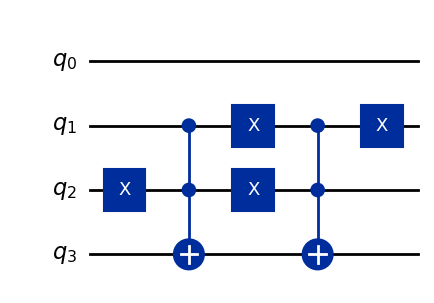

In [ ]:
qcUf = qc_Uf(3)
qcUf.draw('mpl')

In [ ]:
def qc_bernstein_vazirani(n):
    qc = QuantumCircuit(n+1,n)
    qc.x(n)
    qc.h(list(range(n+1)))
    qc.barrier();
    qcUf = qc_Uf(3)
    qc.append(qcUf,list(range(n+1)))
    qc.barrier();
    qc.h(list(range(n)));
    qc.barrier();
    qc.measure(list(range(n)),list(range(n)))
    return qc

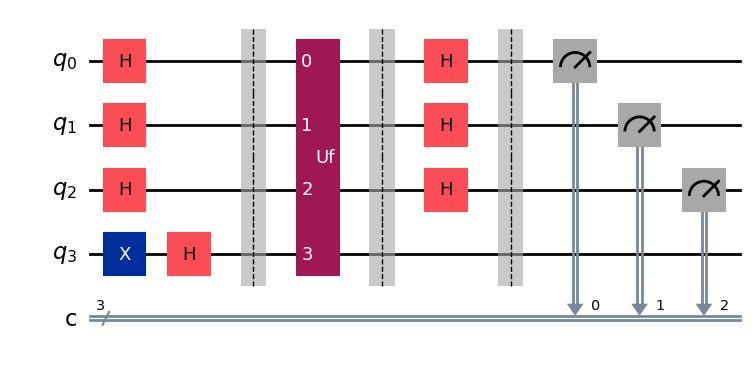

In [ ]:
s = '011' # secret number
n = len(s)
qcbv = qc_bernstein_vazirani(n)
qcbv.draw(output='mpl')

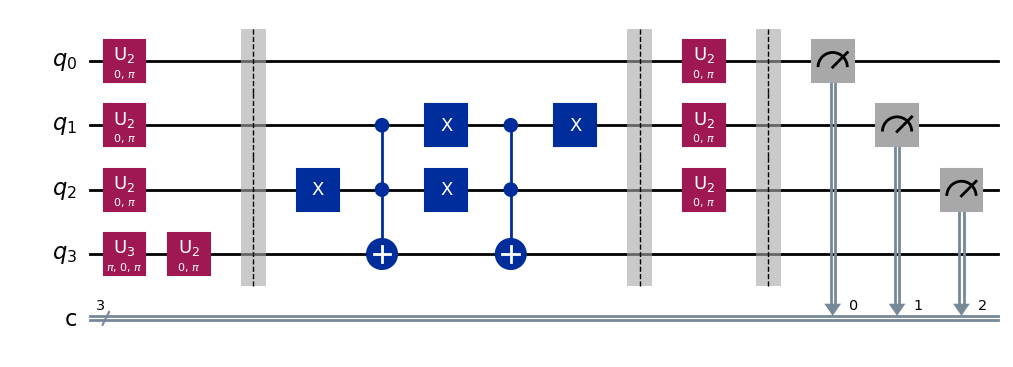

In [ ]:
qcbv.decompose().draw(output='mpl')

## Simulação

In [ ]:
from qiskit_aer import AerSimulator
backend = AerSimulator()
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

In [ ]:
qc_list = []
s = '011' # secret number
n = len(s)
qcbv = qc_bernstein_vazirani(n)
qc_list.append(qcbv.decompose())

In [ ]:
nshots = 2**12
job = sampler.run(qc_list, shots=nshots)

In [ ]:
counts_sim = job.result()[0].data.c.get_counts()
counts_sim # ok!

{'110': 4096}

## Experimento

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum",
                               token="7b16443765c6dfc18e138da6a445926d408b3ee87e0126b012070b18afaf9453238c715064073090fb3ecd90f4674e7f534c410924c9fae043838b229a09d122")
backend = service.backend(name="ibm_osaka")

In [ ]:
from qiskit import transpile
qc_transpiled_list = transpile(qc_list, backend=backend, optimization_level=1)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)
sampler.options.dynamical_decoupling.enable = True
sampler.options.dynamical_decoupling.sequence_type = "XY4"

In [ ]:
job = sampler.run(qc_transpiled_list)
print(job.job_id())

ct7dqgecvhg0008wgr20


In [ ]:
job_id = "ct7dqgecvhg0008wgr20"
job = service.job(job_id)

In [ ]:
counts_exp = job.result()[0].data.c.get_counts()
print(counts_exp)

{'111': 2096, '110': 1307, '001': 123, '100': 100, '011': 141, '000': 70, '101': 176, '010': 83}


## Gráfico

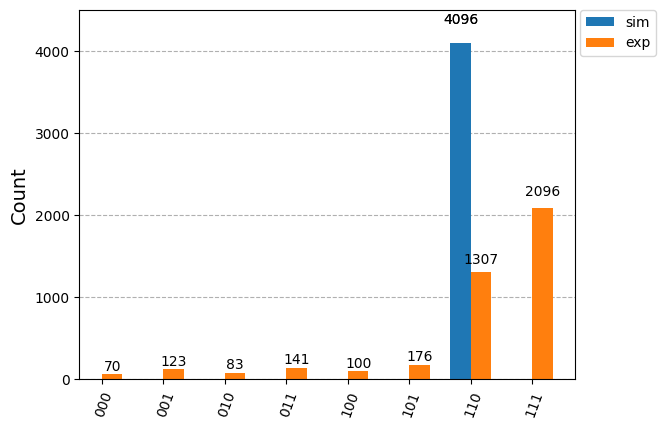

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram([counts_sim,counts_exp],legend = ['sim','exp'])

Assim como fizemos para outros algoritmos, aqui, como no experimento não obtemos somente o estado $|s\rangle$, temos que usar um critério para definir qual estado usaremos como solução. Novamente a escolha mais plausível é o estado que tem maior probabilidade (vamos pelo voto da maioria).

Nesse caso, a _simulação_ indica a solução certa para o problema,
$$s_{sim} = 011,$$
mas o experimento (usando o voto da maioria), indica a solução errada:
$$s_{exp} = 111.$$
Podemos entender o motivo disso olhando para o circuito quântico decomposto que foi executado no experimento. Acontece que quando compilamos as portas multicontroladas em uma sequência de portas básicas, essa sequência é muito longa, o que aumenta o efeito da decoerência e dos erros de porta.

__Exercício:__ Busque maneiras mais otimizadas de implementar esse experimento, tentando identificar com ele a resposta certa para o exemplo considerado aqui.


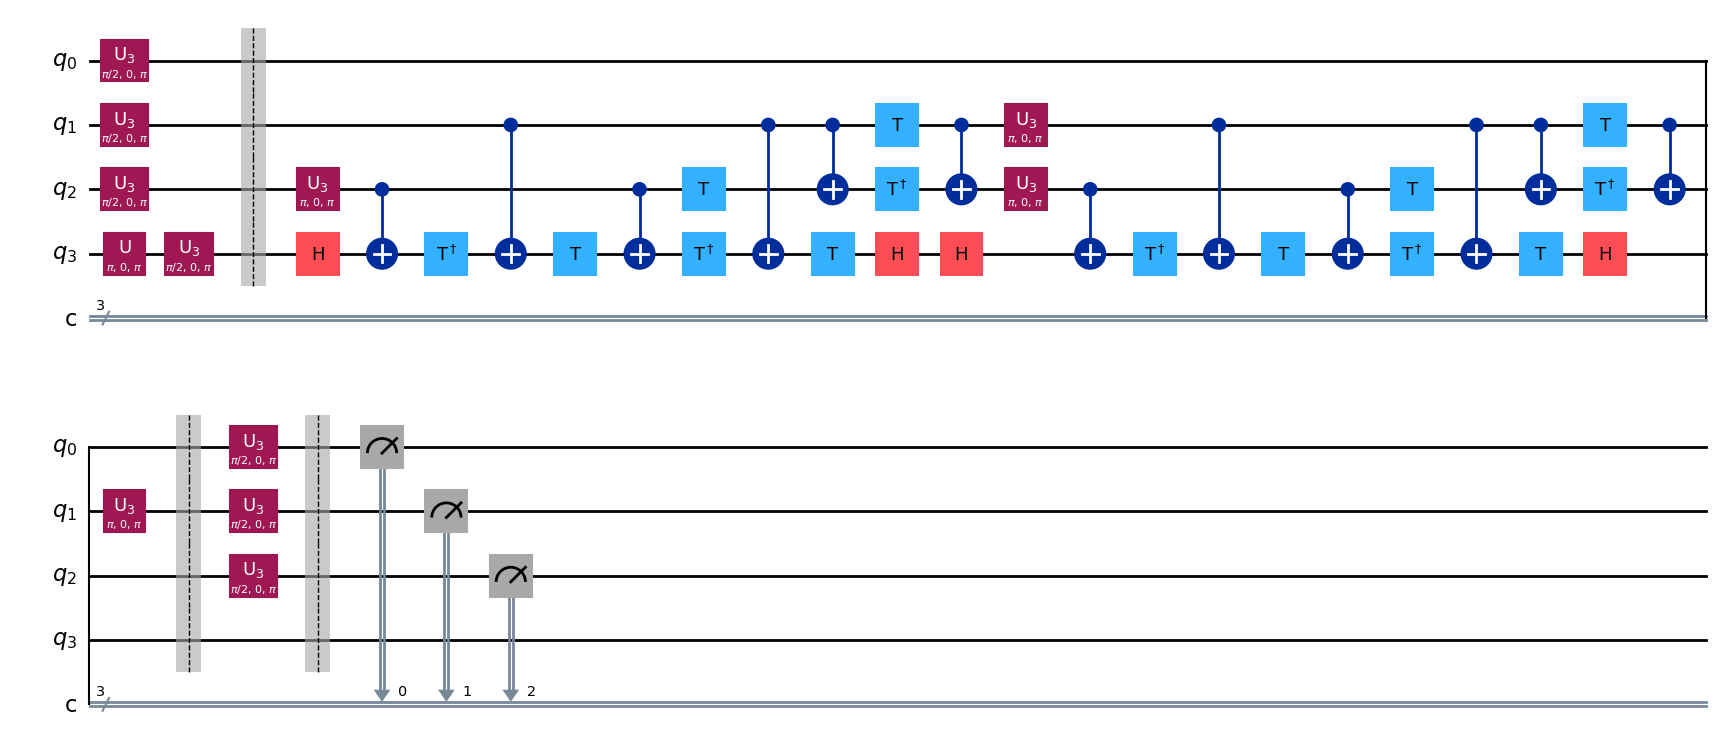

In [ ]:
qcbv.decompose().decompose().draw(output='mpl')

## Complexidade computacional

Como o algoritmo de Bernstein-Vazirani faz somente uma chamada ao oráculo, a complexidade computacional quântica é
$$CC_Q = \mathcal{O}(1).$$

Como vimos anteriormente, no caso clássico, podemos resolver esse problema enviando as $n$ sequências de $n$ bits que contêm um único bit igual a 1. Vemos assim que a complexidade clássica, determinística ou probabilística, é
$$CC_C = \mathcal{O}(n).$$

Há portanto uma _vantagem linear_ do algoritmo quântico em relação ao algoritmo clássico. Ou seja, o algoritmo quântico de Bernstein-Vazirani fornece um ganho mais significativo que o algoritmo de Deutsch-Jozsa, que tem um vantagem constante em relação a algoritmos clássicos não determinísticos. No entanto, qualquer problema que tenha uma complexidade computacional que cresce linearmente com o tamanho do problema é considerado um _problema fácil_. Ou seja, o problema com o algoritmo quântico de Bernstein-Vazirani é que ele é aplicado a um problema muito fácil.

A seguir, veremos o _algoritmo de Bernstein-Vazirani recursivo_, que obtém uma _separação clássica-quântica_ em complexidade computacional mais significativa, _superpolinomial_, somente adaptando o problema anterior.

## Algoritmo de Bernstein-Vazirani recursivo

dddd

## Referências

1. E. Bernstein and U. Vazirani, “Quantum Complexity Theory,” SIAM J. Comput., vol. 26, no. 5, pp. 1411-1473, Oct. 1997, doi: 10.1137/S0097539796300921.

1. M. A. Nielsen and I. L. Chuang, Quantum Computation and Quantum Information (Cambridge University Press, Cambridge, England, 2000).

1. Richard Cleve, Introduction to Quantum Information Processing (2023), https://cs.uwaterloo.ca/~cleve/courses/F11CS667/, https://youtube.com/playlist?list=PLgOc9DWm_Ey3cnHXjmu8f__ki5AJYd53p&si=etCdYsFeCUBTgclj.

1. Dave Bacon, Lecture Notes on Quantum Computing (2006), https://courses.cs.washington.edu/courses/cse599d/06wi/.

1. John Preskill, Lecture Notes on Quantum Computation, http://theory.caltech.edu/~preskill/ph219/index.html#lecture.

1. A. Javadi-Abhari et al., “Quantum computing with Qiskit.” arXiv, May 14, 2024. doi: 10.48550/arXiv.2405.08810.
